<h1><span style="color:#4095a5"><strong>Cyclistic Bike Share - Case Study</strong></span></h1>

*Fictious Company for Google Analytics Certification Capstone*

> The data was collected by Motivate International Inc. and available under this [license](https://www.divvybikes.com/data-license-agreement) agreement.

## **Overview and Deliverables**
For this capstone project an analysis is being performed on a fictional bike-share company, Cyclistic, to help them maximize the number of annual memberships. In order to accomplish this task, the analysis has been broken out into the following deliverables. 

* A clear statement of the business task
* A description of all data sources used
* Documentation of any cleaning or manipulation of data
* A summary of the analysis
* Supporting visualizations and key findings

## **Business Task**
Cyclistic wants to increase annual sales by developing a marketing strategy that converts casual riders to annual members. Analysis needs to be run on their most recent 12 months of ride data so that we can identify how members and casual riders use the bike fleet differently. From there recommendations will be provided for executive approval.

# **Step 1 : Load the required libraries**

In [1]:
library(tidyr)
library(tidyverse)
library(ggplot2)
library(dplyr)
library(plyr)
library(lubridate)
library(ggpubr)
library(gridExtra)
library(readr)

install.packages("devtools")
devtools::install_github("ropensci/skimr")

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.3     ✔ dplyr   1.0.6
✔ tibble  3.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1
✔ purrr   0.3.4     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

------------------------------------------------------------------------------

You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)

------------------------------------------------------------------------------


Attaching package: ‘plyr’


The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


The following object is masked from ‘package:purrr’:

    compact



Attaching package: ‘lubridate’


The following o

# **Step 2 : Loading the dataset**
##### We have csv file, one file for each month as our input data. We load all the csv file and bind them into 1 file.

In [2]:
data <- list.files(path = "../input/divvytripdata-dataset/",
                   pattern = "*.csv", full.names = TRUE)

data_csv = do.call(rbind, lapply(data, function(x) read.csv(x, stringsAsFactors = FALSE)))

In [3]:
head(data_csv)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,86,Lincoln Ave & Diversey Pkwy,152,41.8964,-87.6610,41.9322,-87.6586,member
2,5405B80E996FF60D,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,Drake Ave & Fullerton Ave,503,Kosciuszko Park,499,41.9244,-87.7154,41.9306,-87.7238,member
3,5DD24A79A4E006F4,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,McClurg Ct & Erie St,142,Indiana Ave & Roosevelt Rd,255,41.8945,-87.6179,41.8679,-87.6230,member
4,2A59BBDF5CDBA725,docked_bike,2020-04-07 12:50:19,2020-04-07 13:02:31,California Ave & Division St,216,Wood St & Augusta Blvd,657,41.9030,-87.6975,41.8992,-87.6722,member
5,27AD306C119C6158,docked_bike,2020-04-18 10:22:59,2020-04-18 11:15:54,Rush St & Hubbard St,125,Sheridan Rd & Lawrence Ave,323,41.8902,-87.6262,41.9695,-87.6547,casual
6,356216E875132F61,docked_bike,2020-04-30 17:55:47,2020-04-30 18:01:11,Mies van der Rohe Way & Chicago Ave,173,Streeter Dr & Grand Ave,35,41.8969,-87.6217,41.8923,-87.6120,member


# **Step 3 : Data analysis and Dataset cleaning**
We make the below changes with the dataset :

* Added the following columns:    
    * Add trip duration column by taking the difference between end and start time
    * Create Hour, Date, day_of_week and Month column
* Reorganised columns
* Removed and renamed columns

In [4]:
#  str() and function will provide summaries of each column in your data arranged horizontally.

str(data_csv)

colnames(data_csv)

'data.frame':	3489748 obs. of  13 variables:
 $ ride_id           : chr  "A847FADBBC638E45" "5405B80E996FF60D" "5DD24A79A4E006F4" "2A59BBDF5CDBA725" ...
 $ rideable_type     : chr  "docked_bike" "docked_bike" "docked_bike" "docked_bike" ...
 $ started_at        : chr  "2020-04-26 17:45:14" "2020-04-17 17:08:54" "2020-04-01 17:54:13" "2020-04-07 12:50:19" ...
 $ ended_at          : chr  "2020-04-26 18:12:03" "2020-04-17 17:17:03" "2020-04-01 18:08:36" "2020-04-07 13:02:31" ...
 $ start_station_name: chr  "Eckhart Park" "Drake Ave & Fullerton Ave" "McClurg Ct & Erie St" "California Ave & Division St" ...
 $ start_station_id  : chr  "86" "503" "142" "216" ...
 $ end_station_name  : chr  "Lincoln Ave & Diversey Pkwy" "Kosciuszko Park" "Indiana Ave & Roosevelt Rd" "Wood St & Augusta Blvd" ...
 $ end_station_id    : chr  "152" "499" "255" "657" ...
 $ start_lat         : num  41.9 41.9 41.9 41.9 41.9 ...
 $ start_lng         : num  -87.7 -87.7 -87.6 -87.7 -87.6 ...
 $ end_lat           : num

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

In [5]:
skimr::skim(data_csv)

── Data Summary ────────────────────────
                           Values  
Name                       data_csv
Number of rows             3489748 
Number of columns          13      
_______________________            
Column type frequency:             
  character                9       
  numeric                  4       
________________________           
Group variables            None    

── Variable type: character ────────────────────────────────────────────────────
  skim_variable      n_missing complete_rate   min   max  empty n_unique
1 ride_id                    0         1        16    16      0  3489539
2 rideable_type              0         1        11    13      0        3
3 started_at                 0         1        19    19      0  3040228
4 ended_at                   0         1        19    19      0  3027775
5 start_station_name         0         1         0    53 122175      709
6 start_station_id       83583         0.976     0    35  39218     1260
7 end_

In [6]:
# Creating a copy of the dataframe and all further operations would be done on this new dataframe
data_csv_mod <- data_csv

##### Data Type conversion

In [7]:
# As the start and end time is as character we use below function to convert them to datetime format.
# We would create new columns as start_time and end_time
data_csv_mod <- mutate(data_csv_mod, start_time = ymd_hms(data_csv_mod$started_at), end_time = ymd_hms(data_csv_mod$ended_at))


# Extract hour, day, date and month from the date column and storing them in seperate columns
data_csv_mod$month <- format(as.Date(data_csv_mod$start_time), "%m")
data_csv_mod$day   <- format(as.Date(data_csv_mod$start_time), "%d")
data_csv_mod$day_of_week <- format(as.Date(data_csv_mod$start_time), "%A")
data_csv_mod$hour <-  format(data_csv_mod$start_time, format = "%H")


# Finally we would drop started_at and ended_at columns
drops <- c("started_at", "ended_at", "ride_id")
data_csv_mod <- data_csv_mod[ , !(names(data_csv_mod) %in% drops)]
head(data_csv_mod)

,rideable_type,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,start_time,end_time,month,day,day_of_week,hour
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>
1,docked_bike,Eckhart Park,86,Lincoln Ave & Diversey Pkwy,152,41.8964,-87.6610,41.9322,-87.6586,member,2020-04-26 17:45:14,2020-04-26 18:12:03,04,26,Sunday,17
2,docked_bike,Drake Ave & Fullerton Ave,503,Kosciuszko Park,499,41.9244,-87.7154,41.9306,-87.7238,member,2020-04-17 17:08:54,2020-04-17 17:17:03,04,17,Friday,17
3,docked_bike,McClurg Ct & Erie St,142,Indiana Ave & Roosevelt Rd,255,41.8945,-87.6179,41.8679,-87.6230,member,2020-04-01 17:54:13,2020-04-01 18:08:36,04,01,Wednesday,17
4,docked_bike,California Ave & Division St,216,Wood St & Augusta Blvd,657,41.9030,-87.6975,41.8992,-87.6722,member,2020-04-07 12:50:19,2020-04-07 13:02:31,04,07,Tuesday,12
5,docked_bike,Rush St & Hubbard St,125,Sheridan Rd & Lawrence Ave,323,41.8902,-87.6262,41.9695,-87.6547,casual,2020-04-18 10:22:59,2020-04-18 11:15:54,04,18,Saturday,10
6,docked_bike,Mies van der Rohe Way & Chicago Ave,173,Streeter Dr & Grand Ave,35,41.8969,-87.6217,41.8923,-87.6120,member,2020-04-30 17:55:47,2020-04-30 18:01:11,04,30,Thursday,17


##### We would delete ride_id as its of no use. We will keep station id as we could see there's a difference in count of unique station id and unique station name. So id would be useful in cases where we dont have station name.

In [8]:
# We add new column to find tip duration of all the riders and insert those values in a new column trip_duration

data_csv_mod <- mutate(data_csv_mod, trip_duration_sec = (data_csv_mod$end_time - data_csv_mod$start_time))

In [9]:
data_csv_mod$trip_duration_min <- format(round(difftime(data_csv_mod$end_time, data_csv_mod$start_time,units="mins"), 2), nsmall = 2)
head(data_csv_mod)

,rideable_type,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,start_time,end_time,month,day,day_of_week,hour,trip_duration_sec,trip_duration_min
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<drtn>,<chr>
1,docked_bike,Eckhart Park,86,Lincoln Ave & Diversey Pkwy,152,41.8964,-87.6610,41.9322,-87.6586,member,2020-04-26 17:45:14,2020-04-26 18:12:03,04,26,Sunday,17,1609 secs,26.82 mins
2,docked_bike,Drake Ave & Fullerton Ave,503,Kosciuszko Park,499,41.9244,-87.7154,41.9306,-87.7238,member,2020-04-17 17:08:54,2020-04-17 17:17:03,04,17,Friday,17,489 secs,8.15 mins
3,docked_bike,McClurg Ct & Erie St,142,Indiana Ave & Roosevelt Rd,255,41.8945,-87.6179,41.8679,-87.6230,member,2020-04-01 17:54:13,2020-04-01 18:08:36,04,01,Wednesday,17,863 secs,14.38 mins
4,docked_bike,California Ave & Division St,216,Wood St & Augusta Blvd,657,41.9030,-87.6975,41.8992,-87.6722,member,2020-04-07 12:50:19,2020-04-07 13:02:31,04,07,Tuesday,12,732 secs,12.20 mins
5,docked_bike,Rush St & Hubbard St,125,Sheridan Rd & Lawrence Ave,323,41.8902,-87.6262,41.9695,-87.6547,casual,2020-04-18 10:22:59,2020-04-18 11:15:54,04,18,Saturday,10,3175 secs,52.92 mins
6,docked_bike,Mies van der Rohe Way & Chicago Ave,173,Streeter Dr & Grand Ave,35,41.8969,-87.6217,41.8923,-87.6120,member,2020-04-30 17:55:47,2020-04-30 18:01:11,04,30,Thursday,17,324 secs,5.40 mins


In [10]:
skimr::skim(data_csv_mod)

── Data Summary ────────────────────────
                           Values      
Name                       data_csv_mod
Number of rows             3489748     
Number of columns          18          
_______________________                
Column type frequency:                 
  character                11          
  difftime                 1           
  numeric                  4           
  POSIXct                  2           
________________________               
Group variables            None        

── Variable type: character ────────────────────────────────────────────────────
   skim_variable      n_missing complete_rate   min   max  empty n_unique
 1 rideable_type              0         1        11    13      0        3
 2 start_station_name         0         1         0    53 122175      709
 3 start_station_id       83583         0.976     0    35  39218     1260
 4 end_station_name           0         1         0    53 143242      707
 5 end_station_id         9

#### Some basic readings from the above data summary :
##### * Above function shows summary based on Variable type.
##### * Trip duration consist of negative time, which is incorrect. We would need to take care of that
##### * There are some missing values for start_station_id, end_station_id, end_lat, end_lng
##### * Min start time : 2020-04-01 00:00:30, Max end time : 2021-04-06 11:00:11
##### * There are 709 unique start_station_name  and 1260 unique start_station_id. It can be due to blank start_station_name fields or station_name having more than 1 station_id


In [11]:
# Dealing with the negative trip duration data, i.e end time less than start time
head(subset(data_csv_mod, trip_duration_sec < 0))

,rideable_type,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,start_time,end_time,month,day,day_of_week,hour,trip_duration_sec,trip_duration_min
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<drtn>,<chr>
2423,docked_bike,St. Clair St & Erie St,211,Clinton St & Washington Blvd,91,41.8944,-87.6227,41.8834,-87.6412,member,2020-04-27 17:20:30,2020-04-27 17:20:18,04,27,Monday,17,-12 secs,-0.20 mins
2505,docked_bike,Lake Shore Dr & Belmont Ave,334,Buckingham Fountain,2,41.9408,-87.6392,41.8765,-87.6205,casual,2020-04-20 16:51:18,2020-04-20 16:51:05,04,20,Monday,16,-13 secs,-0.22 mins
3137,docked_bike,Clark St & Schiller St,301,Wells St & Concord Ln,289,41.9080,-87.6315,41.9121,-87.6347,member,2020-04-12 19:09:54,2020-04-12 19:09:40,04,12,Sunday,19,-14 secs,-0.23 mins
3543,docked_bike,Dearborn St & Adams St,37,California Ave & 23rd Pl,442,41.8794,-87.6298,41.8491,-87.6951,member,2020-04-29 17:37:11,2020-04-29 17:37:07,04,29,Wednesday,17,-4 secs,-0.07 mins
8213,docked_bike,Francisco Ave & Foster Ave,471,Damen Ave & Clybourn Ave,163,41.9756,-87.7014,41.9319,-87.6779,member,2020-04-05 15:46:12,2020-04-05 15:46:11,04,05,Sunday,15,-1 secs,-0.02 mins
8564,docked_bike,Racine Ave & Belmont Ave,226,Broadway & Waveland Ave,304,41.9397,-87.6589,41.9491,-87.6486,casual,2020-04-13 14:06:59,2020-04-13 14:06:45,04,13,Monday,14,-14 secs,-0.23 mins


#### We can deal with this scenario in 2 ways :
##### * Delete the rows which has negative time duration, i,e around 10,552 rows
##### * If the data is recorded wrongly i.e start field time filled in end time and vice versa then we can swap the start time and end time in cases were trip duration is negative

In [12]:
# Deleting the rows with negative trip duration
data_csv_new <- subset(data_csv_mod, trip_duration_sec > 0)

skimr::skim(data_csv_new$trip_duration_sec)

── Data Summary ────────────────────────
                           Values                      
Name                       data_csv_new$trip_duratio...
Number of rows             3478810                     
Number of columns          1                           
_______________________                                
Column type frequency:                                 
  difftime                 1                           
________________________                               
Group variables            None                        

── Variable type: difftime ─────────────────────────────────────────────────────
  skim_variable n_missing complete_rate min    max          median   n_unique
1 data                  0             1 1 secs 3523202 secs 874 secs    25630


##### We have deleted the columns with negative trip duration
##### Arranging all the columns in the dataset

In [13]:
data_csv_new <- data_csv_new[, c("member_casual", "rideable_type", "start_time", "end_time", "trip_duration_sec","trip_duration_min", "hour", "day", "day_of_week", "month", "start_station_name", "start_station_id", "end_station_name", "end_station_id", "start_lat", "start_lng", "end_lat", "end_lng")]

head(data_csv_new)

,member_casual,rideable_type,start_time,end_time,trip_duration_sec,trip_duration_min,hour,day,day_of_week,month,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng
,<chr>,<chr>,<dttm>,<dttm>,<drtn>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,member,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,1609 secs,26.82 mins,17,26,Sunday,04,Eckhart Park,86,Lincoln Ave & Diversey Pkwy,152,41.8964,-87.6610,41.9322,-87.6586
2,member,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,489 secs,8.15 mins,17,17,Friday,04,Drake Ave & Fullerton Ave,503,Kosciuszko Park,499,41.9244,-87.7154,41.9306,-87.7238
3,member,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,863 secs,14.38 mins,17,01,Wednesday,04,McClurg Ct & Erie St,142,Indiana Ave & Roosevelt Rd,255,41.8945,-87.6179,41.8679,-87.6230
4,member,docked_bike,2020-04-07 12:50:19,2020-04-07 13:02:31,732 secs,12.20 mins,12,07,Tuesday,04,California Ave & Division St,216,Wood St & Augusta Blvd,657,41.9030,-87.6975,41.8992,-87.6722
5,casual,docked_bike,2020-04-18 10:22:59,2020-04-18 11:15:54,3175 secs,52.92 mins,10,18,Saturday,04,Rush St & Hubbard St,125,Sheridan Rd & Lawrence Ave,323,41.8902,-87.6262,41.9695,-87.6547
6,member,docked_bike,2020-04-30 17:55:47,2020-04-30 18:01:11,324 secs,5.40 mins,17,30,Thursday,04,Mies van der Rohe Way & Chicago Ave,173,Streeter Dr & Grand Ave,35,41.8969,-87.6217,41.8923,-87.6120


##### Data frame Summary based on member type

In [14]:
data_csv_new %>%
  dplyr::group_by(member_casual) %>%
  skimr::skim()

── Data Summary ────────────────────────
                           Values       
Name                       Piped data   
Number of rows             3478810      
Number of columns          18           
_______________________                 
Column type frequency:                  
  character                10           
  difftime                 1            
  numeric                  4            
  POSIXct                  2            
________________________                
Group variables            member_casual

── Variable type: character ────────────────────────────────────────────────────
   skim_variable      member_casual n_missing complete_rate   min   max empty
 1 rideable_type      casual                0         1        11    13     0
 2 rideable_type      member                0         1        11    13     0
 3 trip_duration_min  casual                0         1        14    14     0
 4 trip_duration_min  member                0         1        14    14  

#### From the above summary below are the points :
##### * Median ride time of casual riders is 1273 sec while for member riders its around 689 sec.
##### * There are 12 unique start_station_id  for casual members whereas 35 unique start_station_id  for membership riders

In [15]:
data_csv_new %>%
  dplyr::group_by(member_casual,rideable_type) %>%
  skimr::skim()

── Data Summary ────────────────────────
                           Values                      
Name                       Piped data                  
Number of rows             3478810                     
Number of columns          18                          
_______________________                                
Column type frequency:                                 
  character                9                           
  difftime                 1                           
  numeric                  4                           
  POSIXct                  2                           
________________________                               
Group variables            member_casual, rideable_type

── Variable type: character ────────────────────────────────────────────────────
   skim_variable      member_casual rideable_type n_missing complete_rate   min
 1 trip_duration_min  casual        classic_bike          0         1        14
 2 trip_duration_min  casual        docked_bi

##### * For electric bikes there are 122126 empty start_station_name and 39176 blank start_station_id, whereas its 0 in case of other rideable types. Similar scenario for end station names and id for electric bikes.
##### * On further grouping by member_casual with ride type it seems to be fine, as its same for both casual and member riders.

# **Step 4 : Data Visualisation**

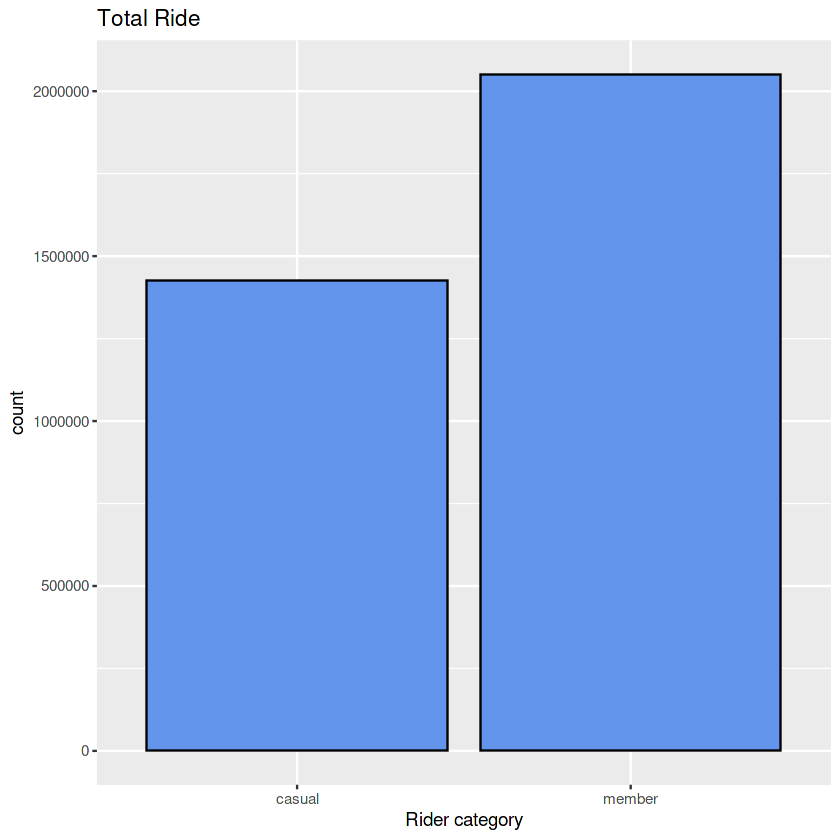

In [16]:
ggplot(data_csv_new,
       aes(x = member_casual)) +
  geom_bar(fill = "cornflowerblue",
           color = "black") +
  labs(x = "Rider category", title  = "Total Ride")

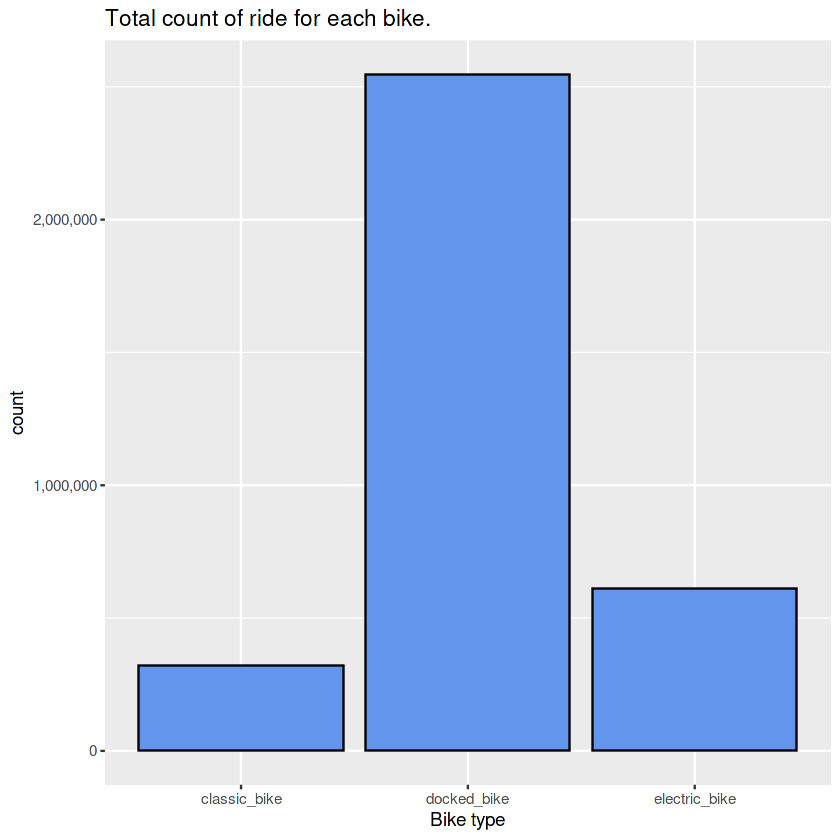

In [17]:
ggplot(data_csv_new,
       aes(x = rideable_type )) +
  geom_bar(fill = "cornflowerblue",
           color = "black") +
  scale_y_continuous(labels = scales::comma) +
  labs(x = "Bike type", title  = "Total count of ride for each bike. ")

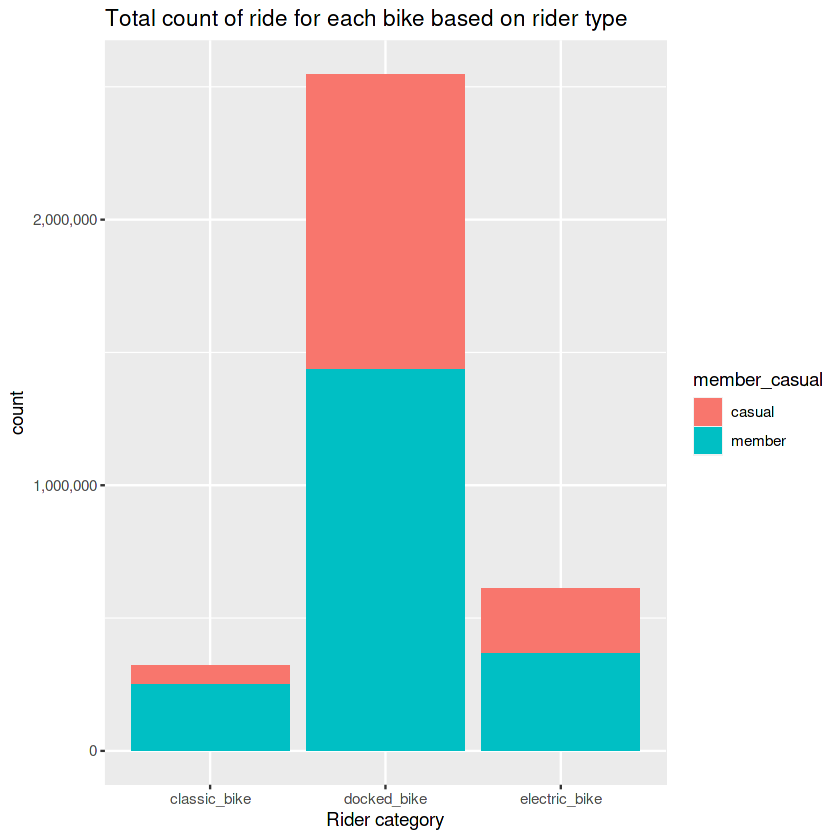

In [18]:
ggplot(data_csv_new,
       aes(x = rideable_type, fill = member_casual )) +
  geom_bar(position = "stack") +
  scale_y_continuous(labels = scales::comma)  +
  labs(x = "Rider category", title  = "Total count of ride for each bike based on rider type ")

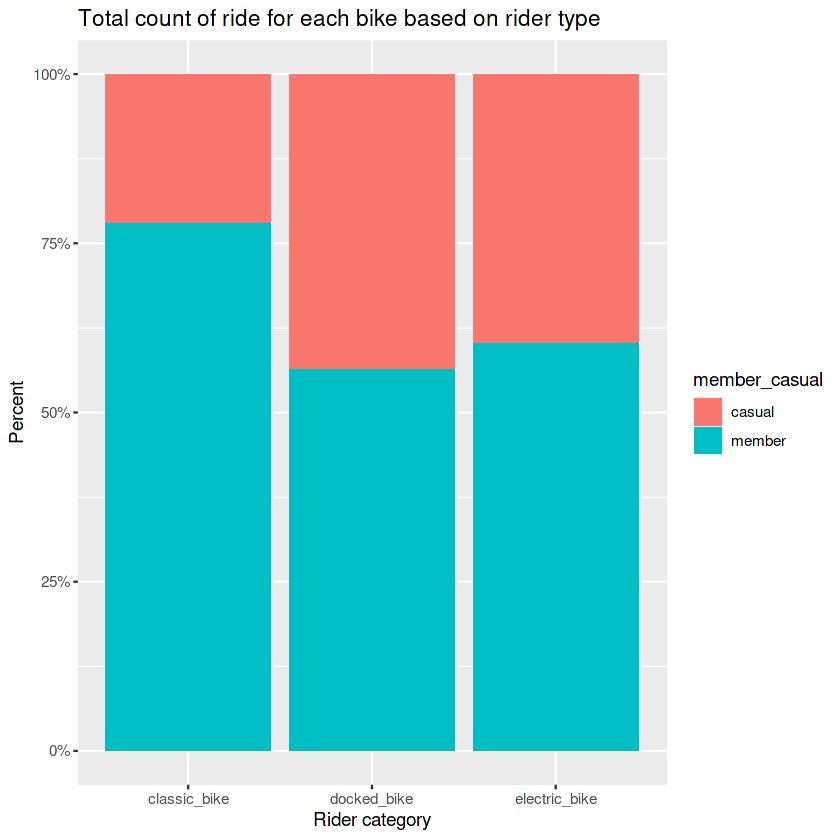

In [19]:
# bar plot, with each bar representing 100%
ggplot(data_csv_new,
       aes(x = rideable_type, 
           fill = member_casual)) + 
  geom_bar(position = "fill") +
  scale_y_continuous(labels = scales::percent) +
  labs(x = "Rider category",y = "Percent", title  = "Total count of ride for each bike based on rider type ")

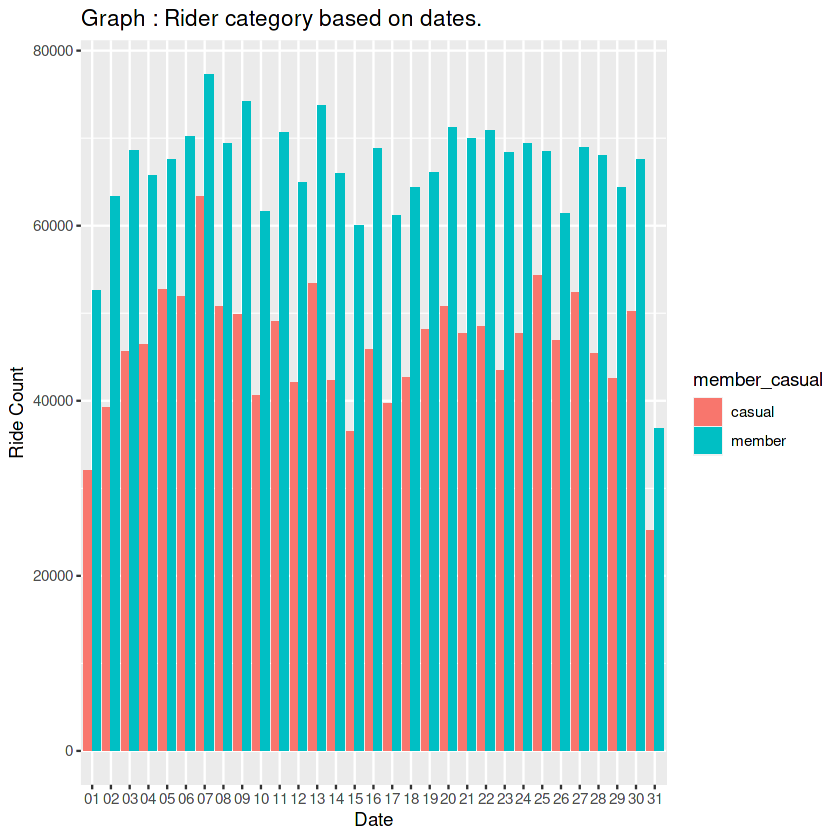

In [20]:
ggplot(data_csv_new,
       aes(x = day, 
           fill = member_casual)) + 
  geom_bar(position = position_dodge(preserve = "single")) +
  labs(x = "Date",y = "Ride Count", title  = "Graph : Rider category based on dates.")

##### Dates doesnt have any impact on the riding pattern.

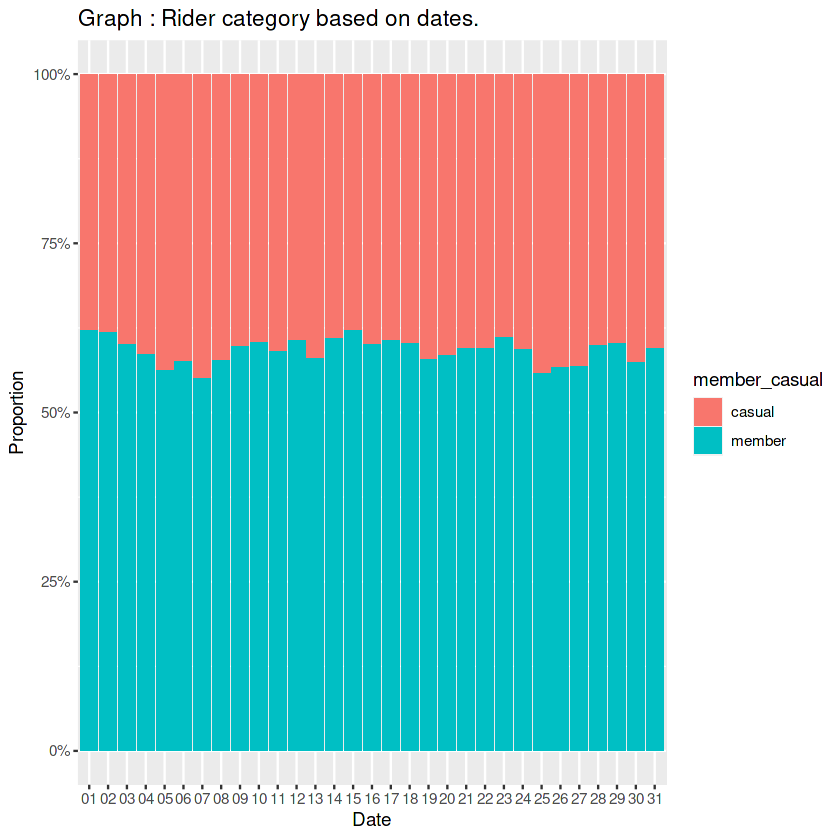

In [21]:
ggplot(data_csv_new,
       aes(x = day, 
           fill = member_casual)) + 
  geom_bar(position = "fill") +
  scale_y_continuous(labels = scales::percent) +
  labs(x = "Date",y = "Proportion", title  = "Graph : Rider category based on dates.")

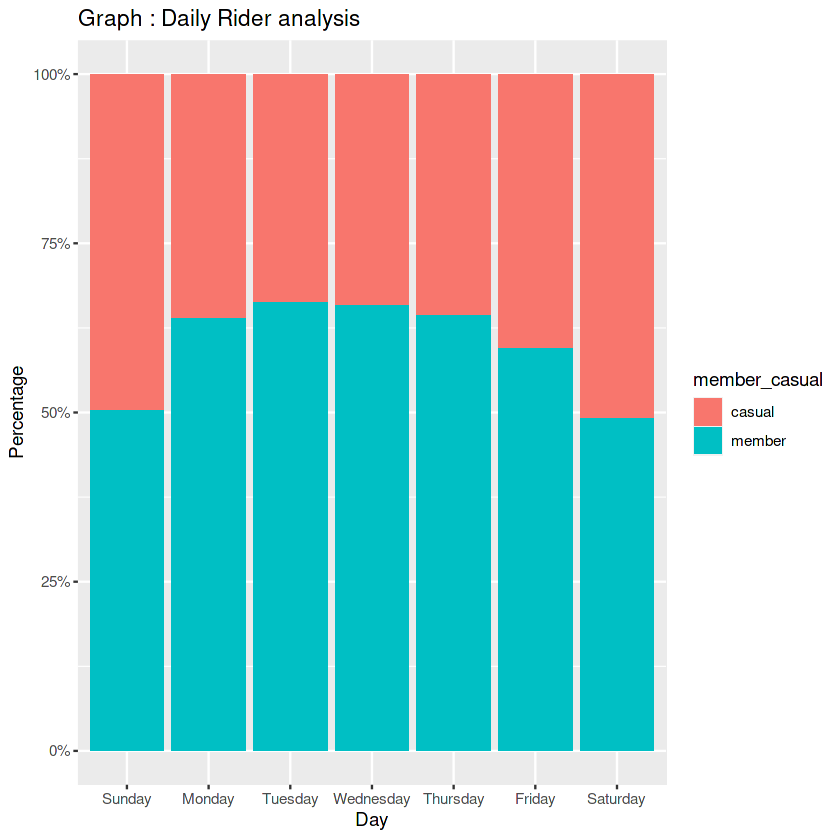

In [22]:
data_csv_new$day_of_week <- ordered(data_csv_new$day_of_week, levels=c("Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"))

ggplot(data_csv_new,
       aes(x = day_of_week, 
           fill = member_casual)) + 
  geom_bar(position = "fill") +
  scale_y_continuous(labels = scales::percent) +
  labs(x = "Day",y = "Percentage", title  = "Graph : Daily Rider analysis")

##### It seems more casual rider on Saturday's and Sunday's then on other weekdays

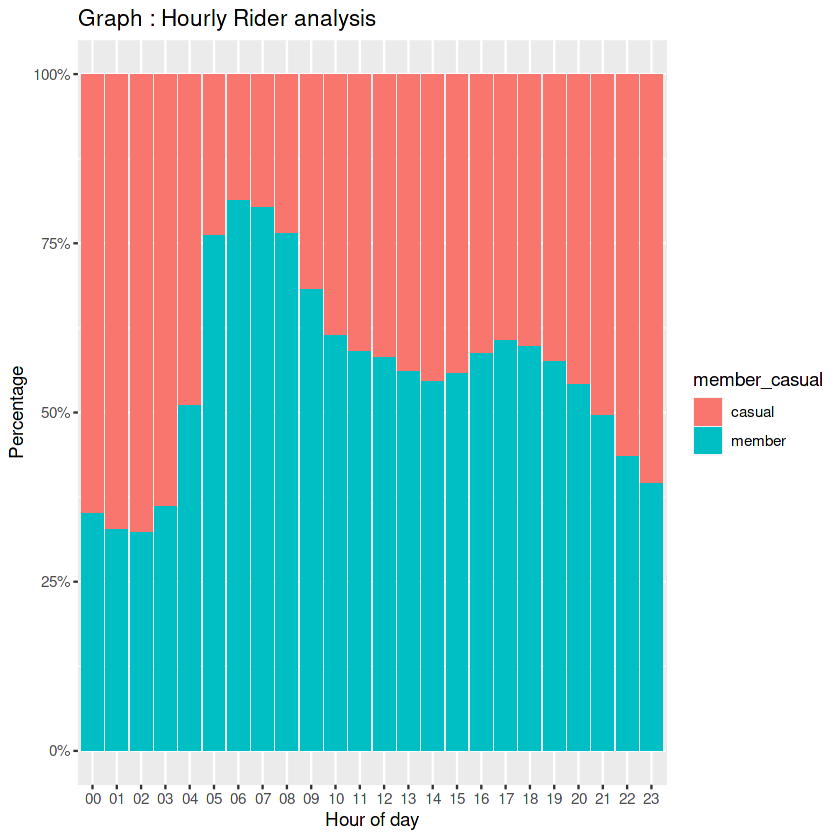

In [23]:
ggplot(data_csv_new,
       aes(x = hour,
           fill = member_casual)) + 
  geom_bar(position = "fill") +
  scale_y_continuous(labels = scales::percent) +
  labs(x = "Hour of day",y = "Percentage", title  = "Graph : Hourly Rider analysis")

##### From above graph it seems more casual rider between 22:00 to 04:00 then other hours of the day.

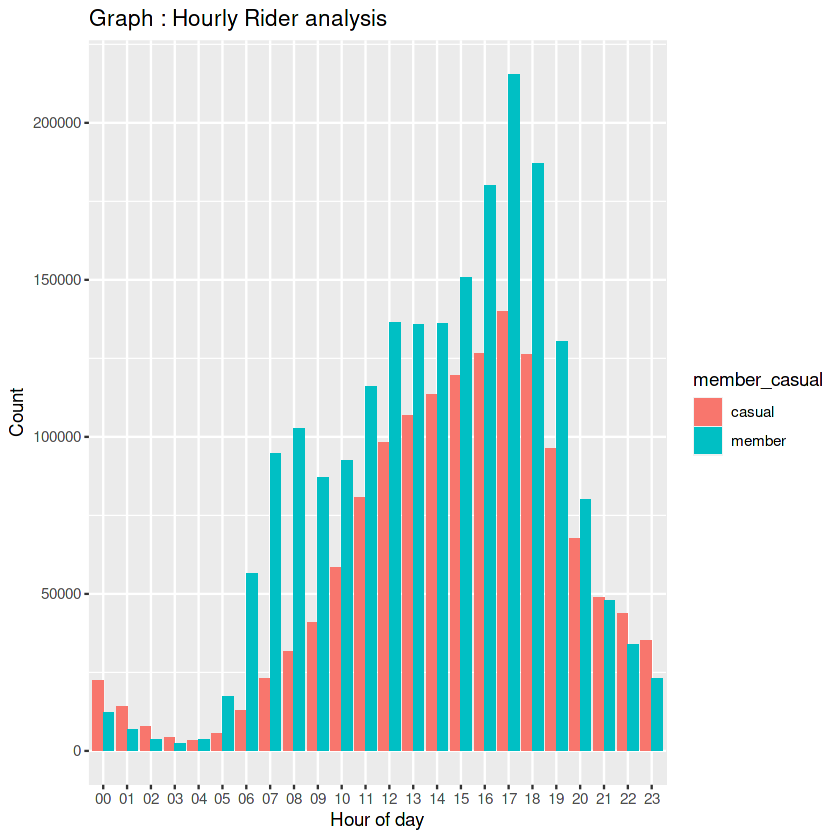

In [24]:
ggplot(data_csv_new,
       aes(x = hour,
           fill = member_casual)) +
  geom_bar(position = position_dodge(preserve = "single")) +
  labs(x = "Hour of day",y = "Count", title  = "Graph : Hourly Rider analysis")

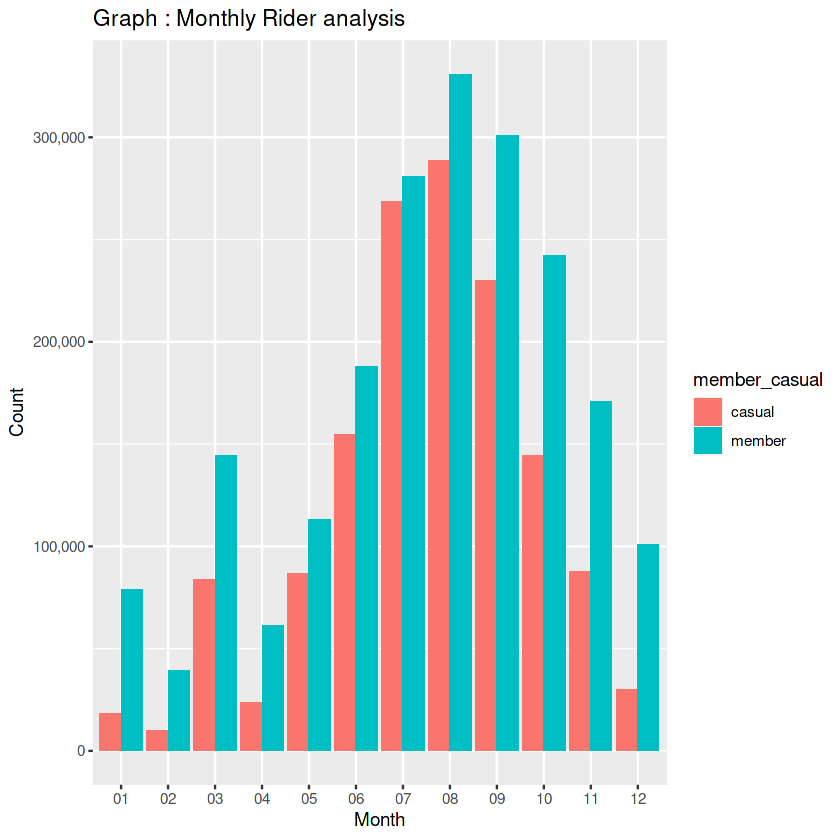

In [25]:
ggplot(data_csv_new,
       aes(x = month,
           fill = member_casual)) +
  geom_bar(position = position_dodge(preserve = "single")) +
  scale_y_continuous(labels = scales::comma) +
  labs(x = "Month",y = "Count", title  = "Graph : Monthly Rider analysis")

##### Weekdays and Weekends Data Analysis

In [26]:
weekday_data <- subset(data_csv_new,day_of_week == "Monday" | day_of_week == "Tuesday" |day_of_week == "Wednesday" | day_of_week == "Thursday"| day_of_week == "Friday")
weekend_data <- subset(data_csv_new, day_of_week == "Saturday" |day_of_week == "Sunday")

##### Weekday :

In [27]:
weekday_casual <- weekday_data %>%
  group_by(member_casual) %>%
  dplyr::summarise(n = n()) %>%
  mutate(pct = n/sum(n), lbl = scales::percent(pct))

weekday_casual

member_casual,n,pct,lbl
<chr>,<int>,<dbl>,<chr>
casual,829682,0.361803,36%
member,1463505,0.638197,64%


##### Weekend :

In [28]:
weekend_casual <- weekend_data %>%
  group_by(member_casual) %>%
  dplyr::summarise(n = n()) %>%
  mutate(pct = n/sum(n), lbl = scales::percent(pct))

weekend_casual

member_casual,n,pct,lbl
<chr>,<int>,<dbl>,<chr>
casual,597277,0.5037664,50.38%
member,588346,0.4962336,49.62%


Above weekday and weekend data report shows us the difference in the riding pattern.

##### Hourly data analysis

In [29]:
day_hour_data <- data_csv_new %>%
  filter(hour %in% c("05","06","07","08","09","10","11","12","13","14","15","16","17","18","19","20"))

night_hour_data <- data_csv_new %>%
  filter(hour %in% c("21","22","23","00","01","02","03","03","04"))

##### Day time :

In [30]:
day_hour <- day_hour_data %>%
  group_by(member_casual) %>%
  dplyr::summarise(n = n()) %>%
  mutate(pct = n/sum(n), lbl = scales::percent(pct))

day_hour

member_casual,n,pct,lbl
<chr>,<int>,<dbl>,<chr>
casual,1247424,0.3940058,39%
member,1918580,0.6059942,61%


##### Night time :

In [31]:
night_hour <- night_hour_data %>%
  group_by(member_casual) %>%
  dplyr::summarise(n = n()) %>%
  mutate(pct = n/sum(n), lbl = scales::percent(pct))

night_hour

member_casual,n,pct,lbl
<chr>,<int>,<dbl>,<chr>
casual,179535,0.57395,57%
member,133271,0.42605,43%


Above day and night hour ride comparision also gives us more insight into the riding patterns.

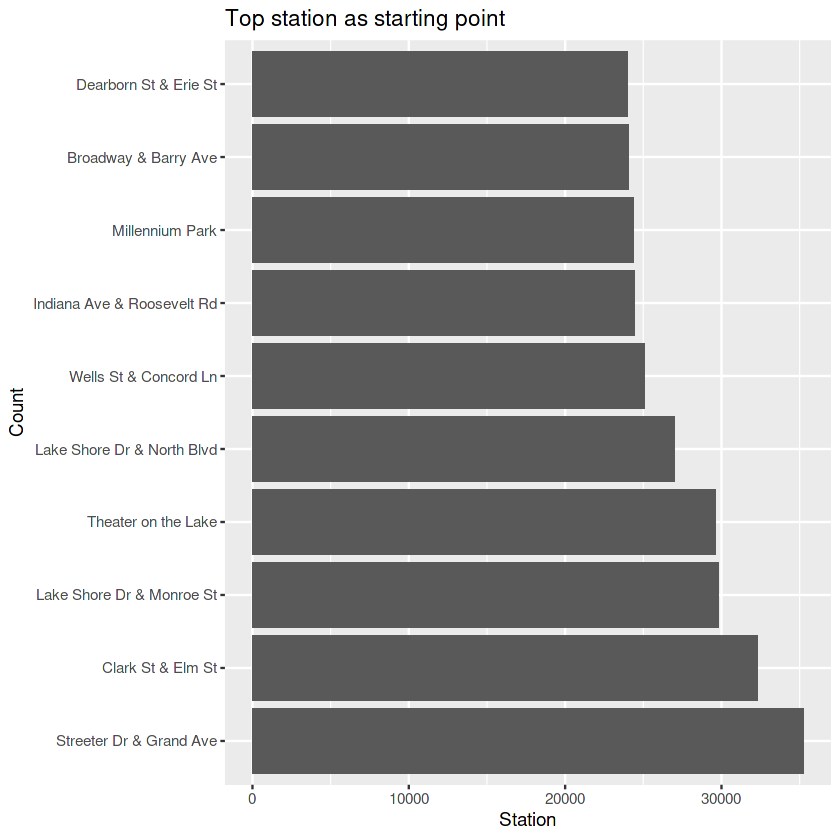

In [32]:
top_stn <- as.data.frame(sort(table(data_csv_new$start_station_name), decreasing=TRUE) [2:11])

ggplot(top_stn,
       aes(x = Var1, 
           y = Freq)) +
  geom_bar(stat="identity") +
  coord_flip() +
  labs(x = "Count",y = "Station", title  = "Top station as starting point")

##### Lets look at the station preference for Casual and Member riders.

In [33]:
member_data <- data_csv_new %>%
  filter(data_csv_new$member_casual == "member")
casual_data <- data_csv_new %>%
  filter(data_csv_new$member_casual == "casual")

# As station name consist of blank fields we will delete that column
member_top_stn <- as.data.frame(sort(table(member_data$start_station_name), decreasing=TRUE) [2:11])
casual_top_stn <- as.data.frame(sort(table(casual_data$start_station_name), decreasing=TRUE) [2:11])

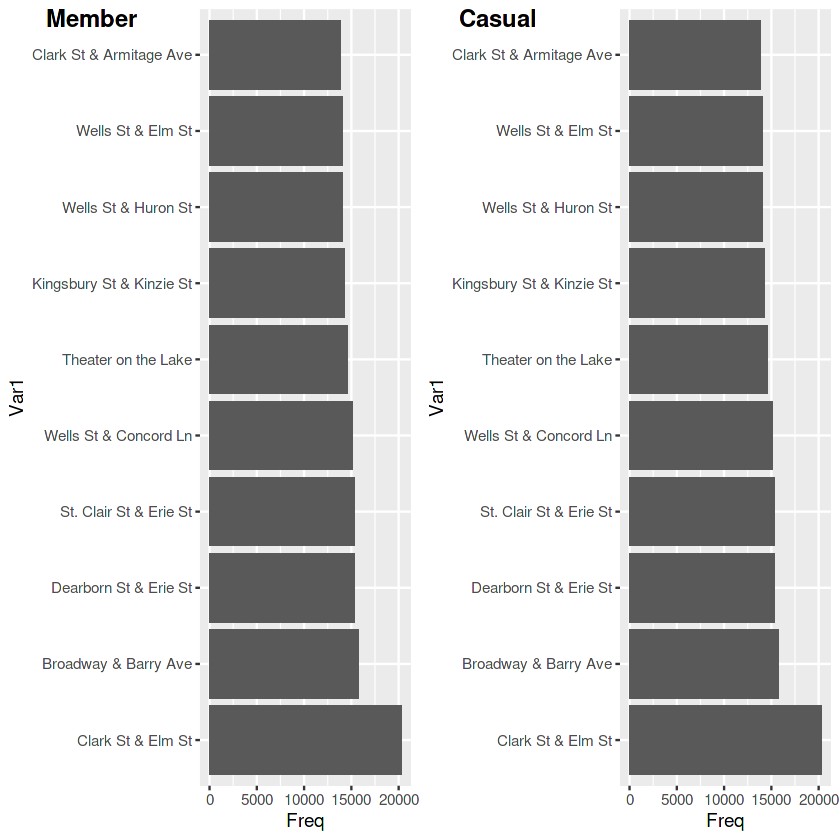

In [34]:
a <- ggplot(member_top_stn,
       aes(x = Freq, y = Var1)) +
  geom_bar(stat="identity")

b <- ggplot(member_top_stn,
       aes(x = Freq, y = Var1)) +
  geom_bar(stat="identity")

ggarrange(a,b,  
          labels = c("Member", "Casual"), ncol = 2, nrow = 1)

In [35]:
plotdata <- data_csv_new %>%
  group_by(member_casual) %>%
  dplyr::summarise(n = n(),
            mean = mean(trip_duration_sec),
            sd = sd(trip_duration_sec),
            se = sd / sqrt(n))

Don't know how to automatically pick scale for object of type difftime. Defaulting to continuous.



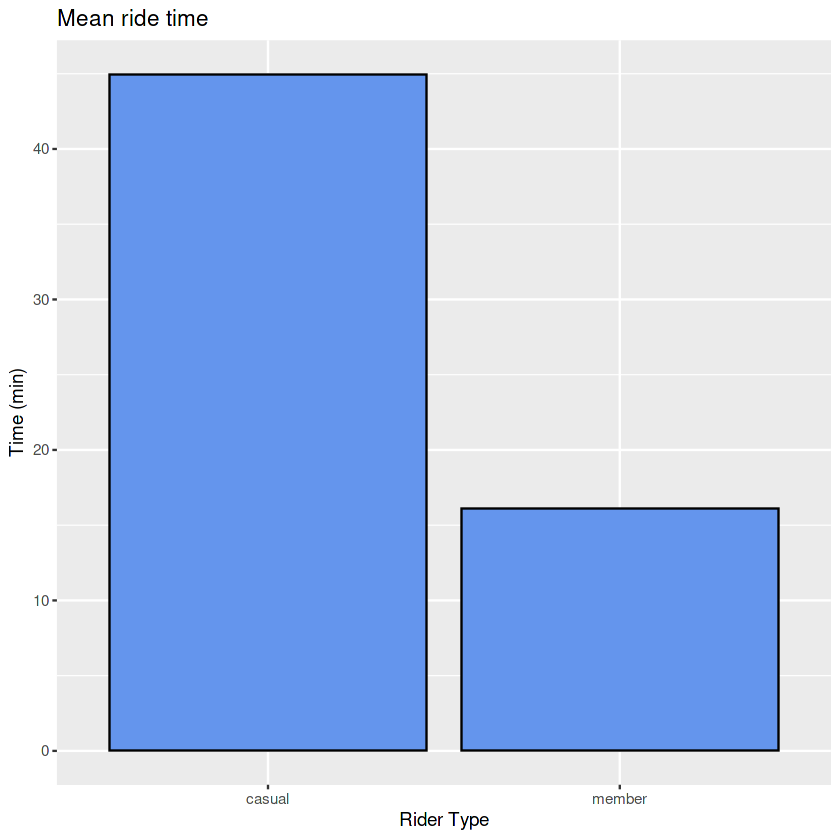

In [36]:
ggplot(plotdata,
       aes(x=member_casual,
           y = mean / 60)) +
  geom_bar(stat="identity",
           fill = "cornflowerblue",
           color = "black") +
  labs(x = "Rider Type", y = "Time (min)", title  = "Mean ride time")

##### Mean ride time of casual members seems to be thrice than that of member riders.

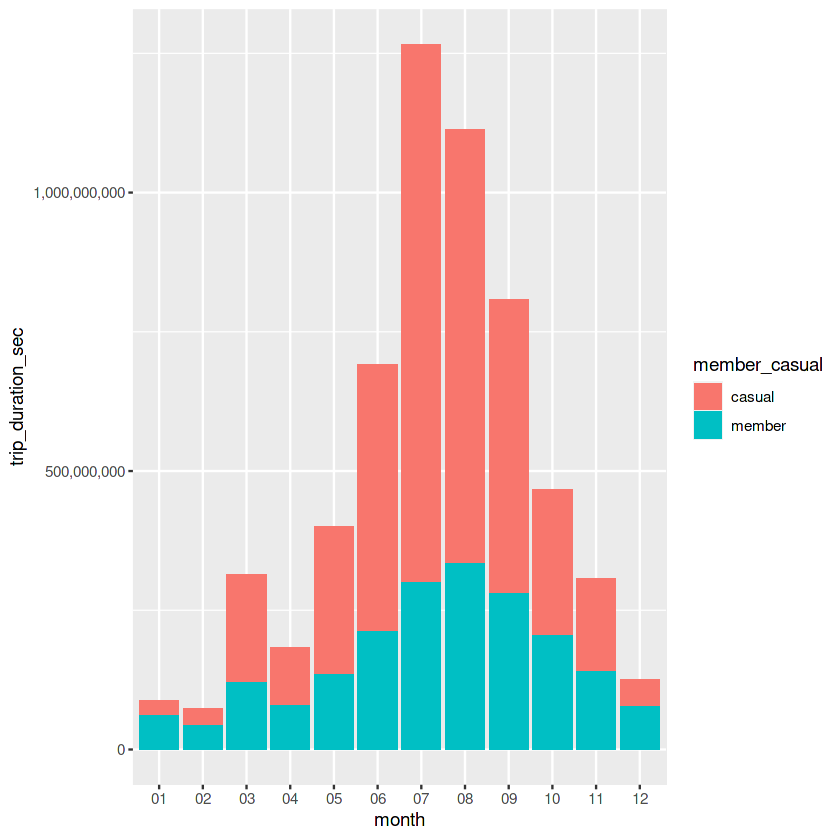

In [37]:
ggplot(data_csv_new) +
  geom_col(mapping=aes(x=month, y=trip_duration_sec, fill=member_casual)) +
scale_y_continuous(labels = scales::comma)

`summarise()` has grouped output by 'day_of_week'. You can override using the `.groups` argument.



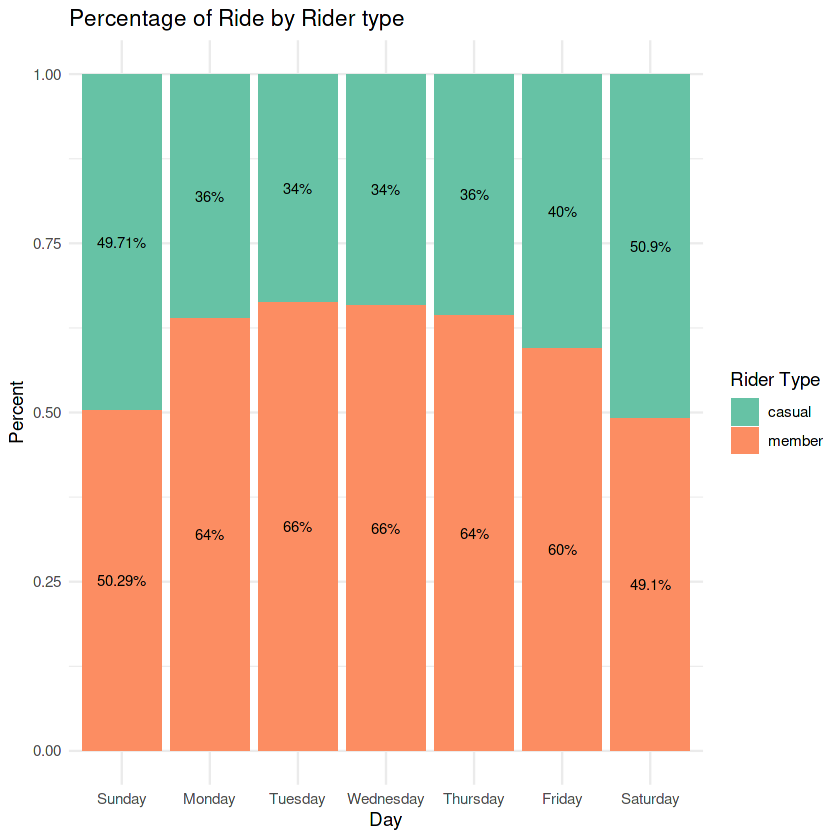

In [38]:
plotdata <- data_csv_new %>%
  group_by(day_of_week, member_casual) %>%
  dplyr::summarise(n = n()) %>%
  mutate(pct = n/sum(n), lbl = scales::percent(pct))

ggplot(plotdata, 
       aes(x = factor(day_of_week,
                      levels = c("Sunday", "Monday", "Tuesday", "Wednesday",
                                 "Thursday", "Friday", "Saturday")),
           y = pct,
           fill = member_casual)) + 
  geom_bar(stat = "identity",
           position = "fill") +
  geom_text(aes(label = lbl), 
            size = 3, 
            position = position_stack(vjust = 0.5)) +
  scale_fill_brewer(palette = "Set2") +
  labs(y = "Percent", 
       fill = "Rider Type",
       x = "Day",
       title = "Percentage of Ride by Rider type") +
  theme_minimal()

`summarise()` has grouped output by 'day_of_week'. You can override using the `.groups` argument.



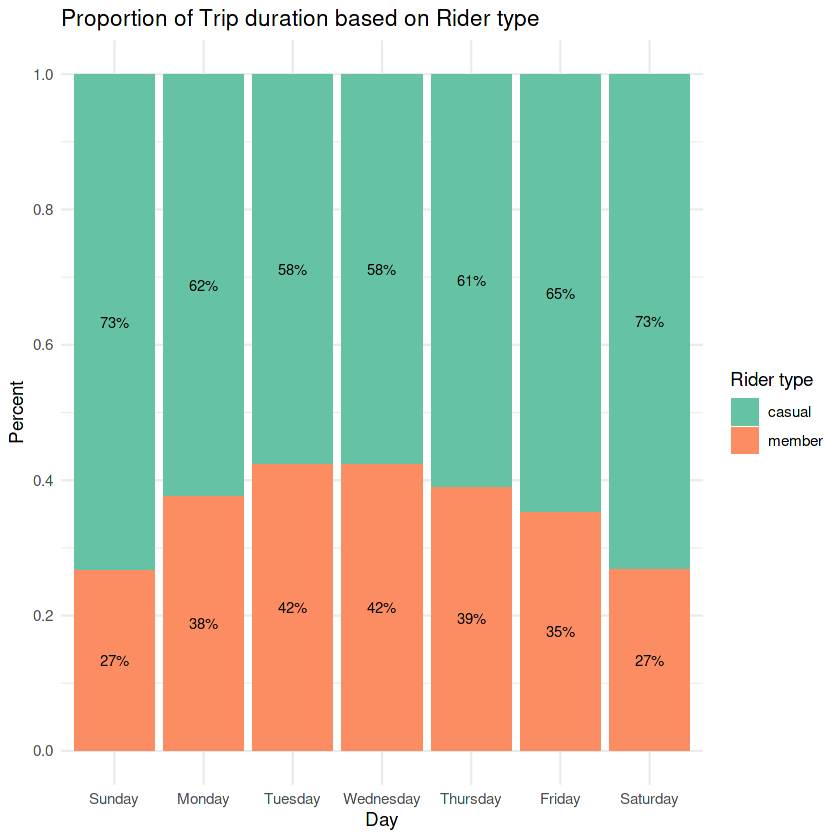

In [39]:
plotdata <- data_csv_new %>%
  group_by(day_of_week, member_casual) %>%
  dplyr::summarise(trip_time = sum(trip_duration_sec)) %>%
  mutate(pct = as.numeric(trip_time)/sum(as.numeric(trip_time)), lbl = scales::percent(pct))

ggplot(plotdata, 
       aes(x = factor(day_of_week,
                      levels = c("Sunday", "Monday", "Tuesday", "Wednesday",
                                 "Thursday", "Friday", "Saturday")),
           y = pct,
           fill = member_casual)) + 
  geom_bar(stat = "identity",
           position = "fill") +
  scale_y_continuous(breaks = seq(0, 1, .2),
                     ) +
  geom_text(aes(label = lbl), 
            size = 3, 
            position = position_stack(vjust = 0.5)) +
  scale_fill_brewer(palette = "Set2") +
  labs(y = "Percent", 
       fill = "Rider type",
       x = "Day",
       title = "Proportion of Trip duration based on Rider type") +
  theme_minimal()

##### Above two visualisation denotes that although Member riders are higher the proportion of the trip duration seems to be pretty high for casual members.

# **5 : Key Takeaways and Recommendations**

# ****
##### 1. As per analysis it seems more casual riders ride during night time between 22:00 to 04:00. Between this time duration 57% of the riders are casual riders, whereas during other hour casual riders accounts only 39% of total.
##### 2. More casual riders ride on weekends i.e Saturday's and Sunday's. Casual riders accounts around 50.3% on weekends, whereas during weekdays they are only 36% of overall riders.
##### 3. Casual Riders have higher mean ride time than that of membership riders. Around 45 min for casual riders and around 16 min for membership riders.
##### 4. More bike rides on July, August and Spetmeber months. Advertisements, promotions and membership announcements during this time can be beneficial.
##### 5. The visualisation in ride time between casual riders and member riders is interesting. It appears members are much more purpose driven in their usage of the bikes.

# **Recommendations**
Based on the full analysis, we are recommended that the stakeholders that the following action steps.
##### 1. Run campaigns during the summer months, and primarly on Friday, Saturday and Sunday. This will capture the largest audience of casual riders. 
##### 2. While the ridership clearly spikes on Friday, Saturday and Sunday for casual riders, Promotions on benefits of turning to membership riders on these days can be helpful.
##### 3. As more casual riders ride during night time, its an good opportunity to convert them to membership riders by proper advertisements and showing them the benefits to them.

# ** Additional Data Points**
Moving forward, the analysis could be further expanded with these additional data points. 
##### 1. Subscriber_Id instead of ride_id would have been more helpful here to determine the actual users pattern of taking a ride. It could give us much more information.
##### 12. Information on cost of causal ride per km and membersip ride per km would have also been very useful to distinguish pattern on why people prefer casual ride.
